In [1]:
%%capture
# Setup: Installing packages we will need in this notebook
%pip install pyfmreader
%pip install matplotlib

In [2]:
# 1. Import pyafmreader loadfile and matplotlib
from pyfmreader import loadfile
import matplotlib.pyplot as plt

# Get documentation about loadfile function
help(loadfile)

Help on function loadfile in module pyfmreader.pyfmreader:

loadfile(filepath)
    Load AFM file. 
    
    Supported formats:
        - JPK --> .jpk-force, .jpk-force-map, .jpk-qi-data
        - JPK Thermal --> .tnd
        - NANOSCOPE --> .spm, .pfc, .00X
        - UFF --> .uff
    
            Parameters:
                    filepath (str): Path to the file.
            
            Returns:
                    If JPK, NANOSCOPE OR UFF:
                        UFF (uff.UFF): Universal File Format object containing loaded data.
                    If JPK Thermal:
                        Amplitude (m^2/V) (np.array),
                        Frequencies (Hz) (np.array),
                        Fit-Data (m^2/V) (np.array),
                        Parameters (dict)



In [3]:
# 2. Load one of the test files
TEST_FILE_PATH = '../tests/testfiles/map-data-2021.11.05-17.37.44.432.jpk-force-map'

TEST_FILE = loadfile(TEST_FILE_PATH)

type(TEST_FILE)

pyfmreader.uff.UFF

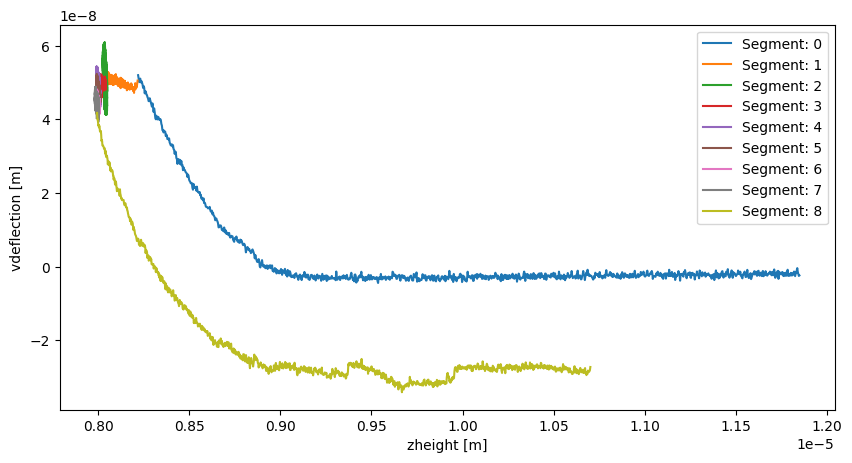

In [4]:
metadata = TEST_FILE.filemetadata
FC = TEST_FILE.getcurve(0)
defl_sens = metadata['defl_sens_nmbyV'] / 1e09 # nm/V --> m/V
height_channel_key = metadata['height_channel_key']
FC.preprocess_force_curve(defl_sens, height_channel_key)
plt.figure(figsize=(10,5))
for segid, segment in FC.get_segments():
    plt.plot(segment.zheight, segment.vdeflection, label=f'Segment: {segid}')
plt.xlabel('zheight [m]')
plt.ylabel('vdeflection [m]')
plt.legend()
plt.show()

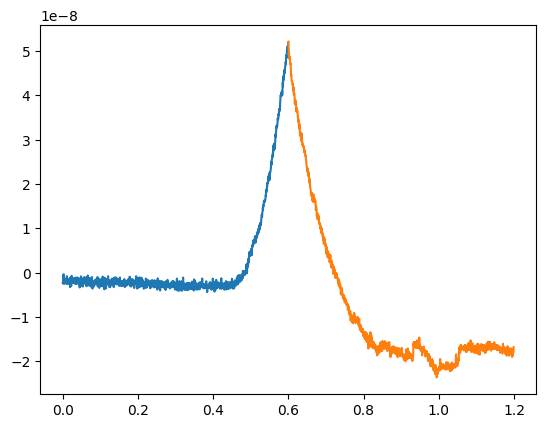

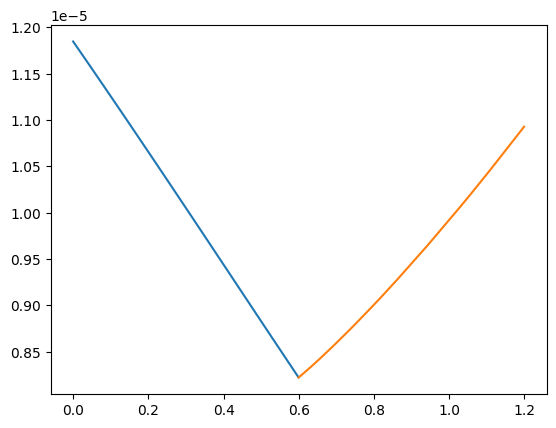

In [5]:
segments = FC.get_segments()
app = segments[0][-1]
ret = segments[-1][-1]
offset_deflection = app.vdeflection[-1] - ret.vdeflection[0]
offset_zheight = app.zheight[-1] - ret.zheight[0]

plt.plot(app.time, app.vdeflection)
plt.plot(ret.time + app.time[-1], ret.vdeflection + offset_deflection)
plt.show()

plt.plot(app.time, app.zheight)
plt.plot(ret.time + app.time[-1], ret.zheight + offset_zheight)
plt.show()